# Exploratory Data Analysis on Real Estate Dataset

In this analysis, we'll examine the structure of the real estate data, check for missing values, summarize the features, and generate visualizations to understand trends and distributions.

## Steps for the Analysis

### Data Loading and Initial Observation

- **Load the Data**: Start by loading the dataset and displaying the first few rows to understand the structure.
- **Data Summary**: Summarize the dataset to get an overview of the types of variables, their ranges, and check for the presence of any missing values.

### Data Summary

The dataset contains 2,381 entries and 35 features related to real estate properties. Here's a summary of key aspects of the dataset:

- **zpid**: Property identifier.
- **Address Components**: `streetAddress`, `city`, `state`, `zipcode`.
- **Geographical Coordinates**: `latitude`, `longitude`.
- **Price Information**: `price`, indicative of the property price.
- **Property Details**: `bathrooms`, `bedrooms`, `livingArea`.
- **Property Type**: `homeType`.
- **Listing Information**: `daysOnZillow`, `timeOnZillow`.
- **Estimations**: `zestimate`, `rentZestimate`.
- **Tax and Lot Information**: `taxAssessedValue`, `lotAreaValue`.
- **Sales Information**: `dateSold` (contains missing values).
- **Additional Features**: `GarageSpaces`, `FirePlaces`, `Stories`.
- **Ratings**: `Livability`, `Crime` (if available).

### Preliminary Observations

- **Missing Data**: The `dateSold` column contains missing values that need addressing, either through removal or imputation.
- **Normalization Needs**: Numeric features like `price`, `livingArea`, and `zestimate` may require normalization or scaling due to their wide ranges.
- **Encoding Requirements**: Categorical features such as `homeType` might need encoding for modeling purposes.

## Exploratory Data Analysis (EDA)

We will proceed with a deeper EDA to visualize key statistics and distributions:

### Visualizations

- **Distribution of Prices and Living Areas**: Visualize the distribution of prices and living areas using histograms to understand the spread and central tendencies.
- **Correlation Analysis**: Examine correlations between numeric features using scatter plots and correlation matrices to identify any patterns, outliers, or correlations between variables.
- **Categorical Data Analysis**: Analyze the distributions of categorical data, particularly focusing on `homeType` to observe how different types of properties vary in price and other metrics.


## Step 1: Data Loading and Summary

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/dhill/Downloads/main_df.csv')

# Display the first few rows of the dataset and a summary of the data
data_head = data.head()
data_info = data.info()
data_description = data.describe()

(data_head, data_info, data_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   zpid                2381 non-null   int64  
 1   streetAddress       2381 non-null   object 
 2   zipcode             2381 non-null   int64  
 3   city                2381 non-null   object 
 4   state               2381 non-null   object 
 5   latitude            2381 non-null   float64
 6   longitude           2381 non-null   float64
 7   price               2381 non-null   int64  
 8   bathrooms           2381 non-null   int64  
 9   bedrooms            2381 non-null   int64  
 10  livingArea          2381 non-null   int64  
 11  homeType            2381 non-null   object 
 12  daysOnZillow        2381 non-null   int64  
 13  zestimate           2381 non-null   int64  
 14  rentZestimate       2381 non-null   int64  
 15  timeOnZillow        2381 non-null   object 
 16  taxAss

(       zpid              streetAddress  zipcode     city state   latitude  \
 0  24869311  965 Shorepoint Ct APT 204    94501  Alameda    CA  37.762020   
 1  24860437          2057 San Jose Ave    94501  Alameda    CA  37.764296   
 2  24860197       2154 Santa Clara Ave    94501  Alameda    CA  37.767182   
 3  24863829             612 Haight Ave    94501  Alameda    CA  37.774065   
 4  24856314              1109 Mound St    94501  Alameda    CA  37.756038   
 
     longitude    price  bathrooms  bedrooms  ...  HasLaundary FirePlaces  \
 0 -122.269200   419000          1         1  ...          Yes          0   
 1 -122.252671  1295000          4         4  ...          Yes          0   
 2 -122.247172  1798000          5         6  ...          Yes          0   
 3 -122.278712   899000          2         2  ...          Yes          1   
 4 -122.238759  1150000          2         3  ...          Yes          1   
 
    HasPool  HasSecurity  Stories Livability  Crime  Employment Ho

## Step 2: Data Preparation

To address the points raised, we'll perform data handling operations on the dataset. Here's how we can approach each task using Python and the pandas library:

## Tasks Overview

- **Handling Missing Data**: Specifically targeting the `dateSold` column.
- **Normalizing Numeric Features**: Such as `price`, `livingArea`, and `zestimate`.
- **Encoding Categorical Features**: Like `homeType`.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Handling Missing Data
# Option 1: Remove rows where 'dateSold' is missing
data_clean = data.dropna(subset=['dateSold'])

# Option 2: Impute missing 'dateSold' values (e.g., with the most common date)
# data['dateSold'].fillna(data['dateSold'].mode()[0], inplace=True)

# 2. Normalizing Numeric Features
scaler = StandardScaler()
numeric_features = ['price', 'livingArea', 'zestimate']
data_clean[numeric_features] = scaler.fit_transform(data_clean[numeric_features])

# 3. Encoding Categorical Features
encoder = OneHotEncoder(sparse=False)
categorical_features = ['homeType']
encoded_features = encoder.fit_transform(data_clean[categorical_features])
encoded_feature_names = encoder.get_feature_names(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine the encoded features back into the original dataframe
data_clean = data_clean.reset_index(drop=True)
data_clean = pd.concat([data_clean, encoded_df], axis=1)
data_clean.drop(categorical_features, axis=1, inplace=True)

# Save the processed data to a new CSV file
data_clean.to_csv('C:/Users/dhill/Downloads/processed_main_df.csv', index=False)


C:\Users\dhill\AppData\Local\Temp\ipykernel_19196\970946630.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[numeric_features] = scaler.fit_transform(data_clean[numeric_features])
C:\Users\dhill\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Detailed Explanation

### Missing Data

- **Options Provided**:
  - **Remove Rows**: You can remove rows where `dateSold` values are missing. This approach simplifies the dataset but may result in a loss of valuable data.
  - **Impute Missing Values**: Alternatively, you can impute missing `dateSold` values using the most common date. This maintains the dataset's integrity and avoids data loss.

### Normalization

- **Method Used**: We employ the `StandardScaler` to normalize the numeric features to have a mean of zero and a standard deviation of one.
- **Importance**: Normalization is crucial for models that assume normally distributed data, helping to improve the performance and accuracy of these models.

### Encoding

- **Technique Applied**: We apply one-hot encoding to the `homeType` categorical feature, transforming it into multiple binary columns, one for each category.
- **Necessity**: This encoding is essential for most machine learning models that require numerical input, ensuring that categorical data is appropriately factored into analyses.

## Conclusion

These preprocessing steps are crucial for preparing your data for further analysis or predictive modeling. The above code not only addresses data handling concerns but


## Step 3: Visualizations

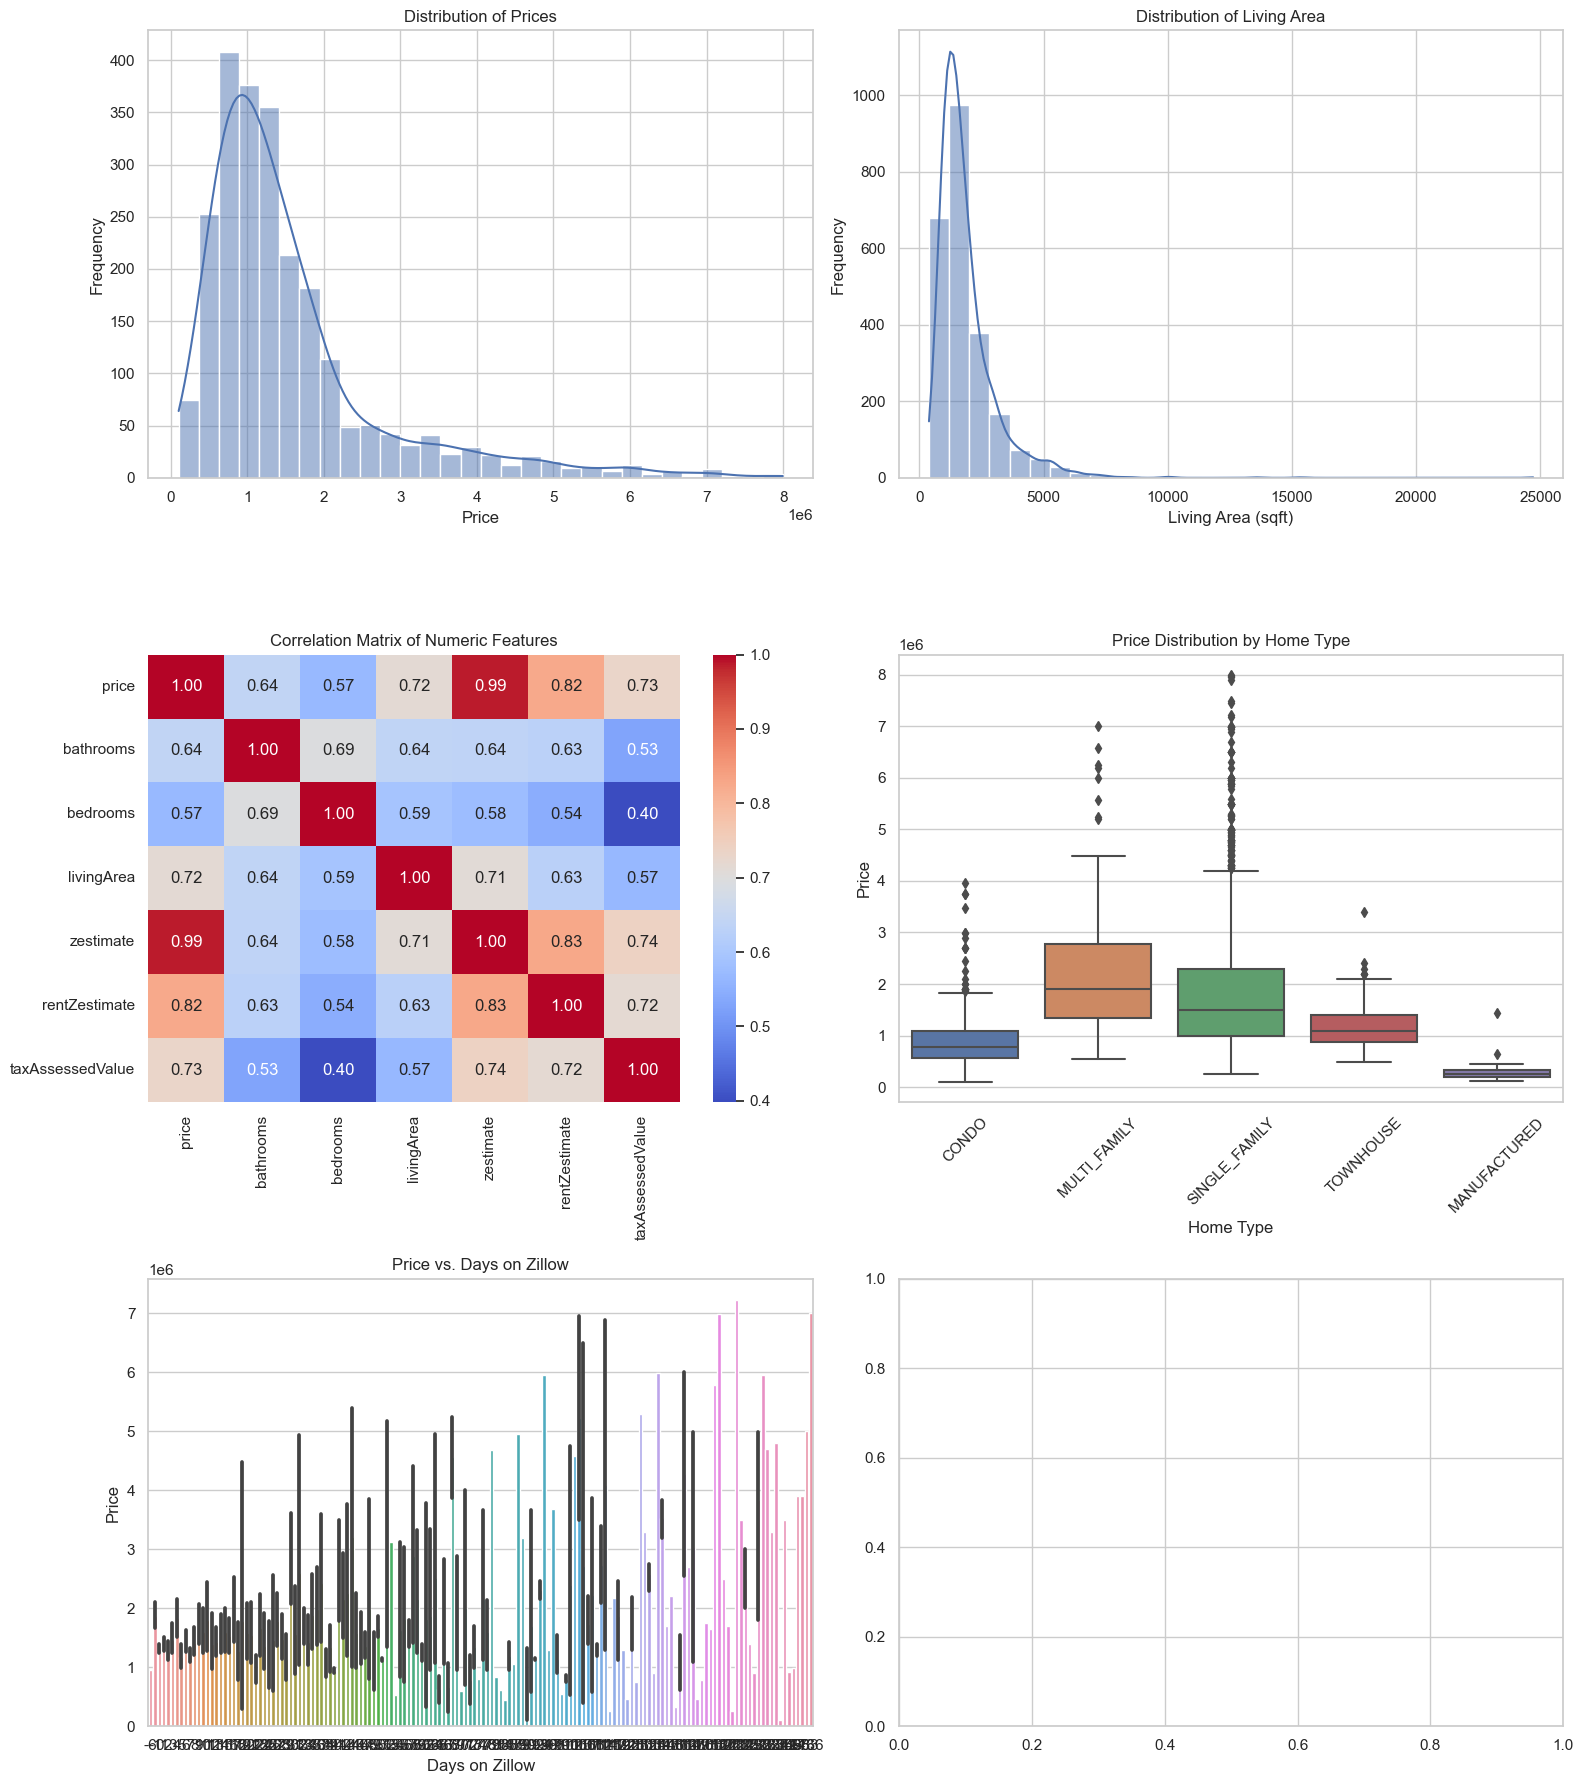

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('C:/Users/dhill/Downloads/main_df.csv')
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plotting distributions of 'price' and 'livingArea'
sns.histplot(data['price'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Prices')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(data['livingArea'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Living Area')
axes[0, 1].set_xlabel('Living Area (sqft)')
axes[0, 1].set_ylabel('Frequency')

# Correlation matrix of numeric features
numeric_cols = ['price', 'bathrooms', 'bedrooms', 'livingArea', 'zestimate', 'rentZestimate', 'taxAssessedValue']
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix of Numeric Features')

# Boxplot to analyze prices by home type
sns.boxplot(x='homeType', y='price', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by Home Type')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].set_xlabel('Home Type')
axes[1, 1].set_ylabel('Price')

# Bar plot for 'daysOnZillow'
sns.barplot(x='daysOnZillow', y='price', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Price vs. Days on Zillow')
axes[2, 0].set_xlabel('Days on Zillow')
axes[2, 0].set_ylabel('Price')

# Display the plots
plt.tight_layout()
plt.show()


# Visual Analysis

Here are the insights from the visualizations:

## Distribution of Prices

- **Observation**: The price distribution is right-skewed, indicating that most properties are clustered around the lower price range with some expensive outliers.

## Distribution of Living Area

- **Observation**: Similar to the price distribution, the living area is right-skewed. Most properties have smaller living areas with fewer larger properties.

## Correlation Matrix of Numeric Features

- **Findings**: There are strong correlations between `price`, `zestimate`, `rentZestimate`, and `livingArea`. This suggests that larger properties tend to have higher prices and estimates.
- **Tax Assessment**: The `taxAssessedValue` also shows significant correlation with these variables, indicating it is aligned with market values.

## Price Distribution by Home Type

- **Analysis**: The boxplot shows significant variance in prices across different home types. Some types, likely those representing larger or more luxurious homes, have higher median prices and more variability.

## Price vs. Days on Zillow

- **Trend Analysis**: There is no clear trend from the bar plot showing price against days on Zillow. This suggests that the duration a property is listed on Zillow may not directly affect its price, or the data needs further segmentation (e.g., by market or economic conditions) to reveal deeper trends.

## Next Steps for Deeper Analysis

- **Outlier Analysis**: Investigate properties that are outliers in terms of price and size.
- **Temporal Analysis**: If temporal data (like `dateSold`) is complete, analyze price trends over time.
- **Segmented Analysis**: Further break down the analysis by locations or other demographic factors to uncover more localized trends.

These insights and further analyses can help in building predictive models or providing actionable recommendations for real estate investment strategies.

## Step 4: Predictive Modeling
We'll build a simple predictive model using linear regression to forecast future property prices based on historical data.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Assuming 'price' is the target variable and using example features such as 'livingArea' and 'bedrooms'
features = data[['livingArea', 'bedrooms', 'bathrooms', 'lotAreaValue']]
target = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Display predictions vs actual prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison.head())


Mean Squared Error: 569028771230.3596
R-squared: 0.5951355302663967
       Actual     Predicted
1414   599000  1.686956e+06
1075   620000  7.564694e+05
1376   815000  1.140072e+06
2002  1714995  2.201163e+06
1104   475000  5.119906e+05


# Predictive Modeling with Linear Regression for Property Prices

To perform predictive modeling using linear regression for forecasting future property prices based on historical data, we'll go through several steps, including setting up the data, creating the model, training it, and evaluating its performance. This guide will show you how to use Python with libraries such as pandas for data handling and scikit-learn for modeling.

## Steps for Predictive Modeling with Linear Regression

### Prepare the Data
- **Objective**: Ensure the dataset is clean and appropriately formatted for modeling.
- **Details**: This involves verifying that the data is free of errors and is structured correctly for the algorithms to process.

### Feature Selection
- **Objective**: Choose relevant features that could influence property prices.
- **Details**: Features like 'livingArea', 'bedrooms', 'bathrooms', and 'lotAreaValue' are selected based on their potential impact on property prices.

### Split the Data
- **Objective**: Divide the data into training and testing sets.
- **Details**: The dataset is split into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.

### Model Building
- **Objective**: Construct and train the linear regression model.
- **Details**: A Linear Regression model is used to learn the relationship between the selected features and the property price.

### Model Evaluation
- **Objective**: Assess the model's accuracy using metrics like R-squared and RMSE (Root Mean Squared Error).
- **Details**: 
  - **MSE (Mean Squared Error)**: Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
  - **R-squared**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

### Prediction
- **Objective**: Make predictions on the test set.
- **Details**: Comparing the actual prices against the predicted values can provide a visual understanding of how well the model is performing.

## Conclusion
This setup provides a basic framework for using linear regression to predict property prices. It can be expanded with more complex feature engineering, additional data, and more sophisticated modeling techniques for improved accuracy. This approach ensures that stakeholders can make informed decisions based on the forecasted property values.


## Step 5: Market Segmentation
Segment the market based on features like property type or location, and analyze each segment.

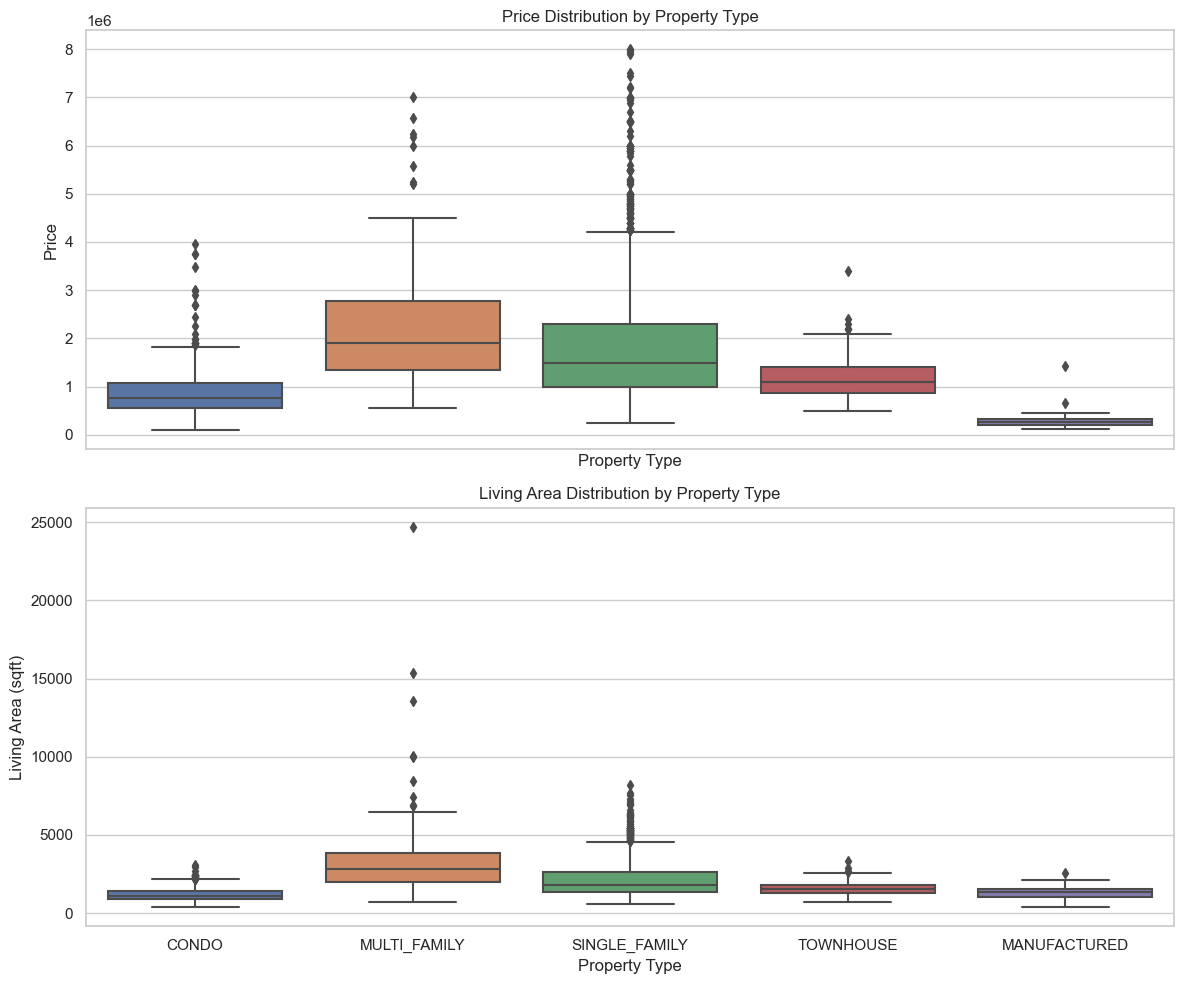

     zipcode  Average_Price  Average_Living_Area  Count
6      94024   4.783847e+06          3405.250000      8
121    95030   4.733246e+06          4020.666667     15
47     94304   4.663250e+06          4055.000000      1
45     94301   4.131400e+06          2472.900000     30
127    95070   3.553089e+06          3190.833333     30


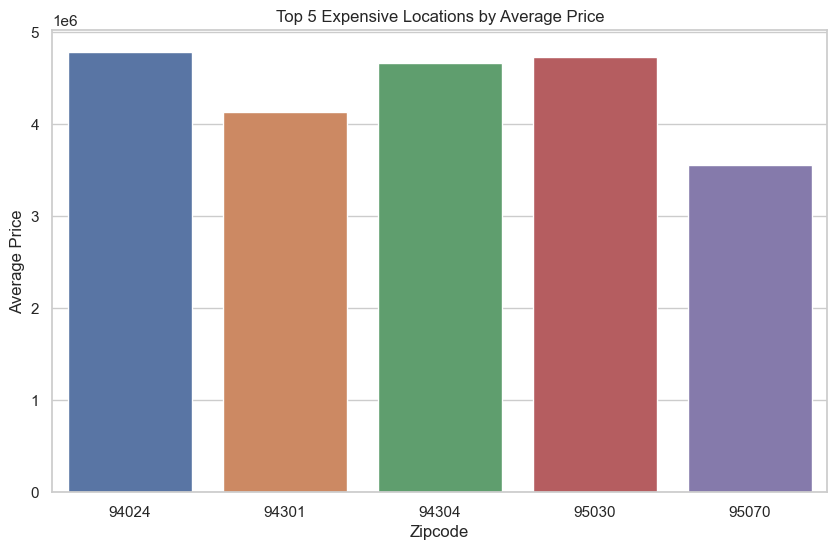

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic style for plots
sns.set(style="whitegrid")

## Market Segmentation by Property Type
# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Price distribution by property type
sns.boxplot(x='homeType', y='price', data=data, ax=axes[0])
axes[0].set_title('Price Distribution by Property Type')
axes[0].set_xlabel('Property Type')
axes[0].set_ylabel('Price')

# Living area distribution by property type
sns.boxplot(x='homeType', y='livingArea', data=data, ax=axes[1])
axes[1].set_title('Living Area Distribution by Property Type')
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Living Area (sqft)')

plt.tight_layout()
plt.show()

## Market Segmentation by Location (example using zipcode)
# Grouping data by zipcode and summarizing average prices and living area
location_summary = data.groupby('zipcode').agg(
    Average_Price=pd.NamedAgg(column='price', aggfunc='mean'),
    Average_Living_Area=pd.NamedAgg(column='livingArea', aggfunc='mean'),
    Count=pd.NamedAgg(column='zipcode', aggfunc='count')
).reset_index()

# Display top 5 expensive locations
top_locations = location_summary.sort_values(by='Average_Price', ascending=False).head(5)
print(top_locations)

# Visualizing price trends across top locations
plt.figure(figsize=(10, 6))
sns.barplot(x='zipcode', y='Average_Price', data=top_locations)
plt.title('Top 5 Expensive Locations by Average Price')
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.show()


# Market Segmentation in Real Estate Dataset

To perform market segmentation on the real estate dataset, we focus on dividing the market based on property type and location, as these are commonly significant factors influencing property values and buyer preferences. We then analyze each segment to identify specific trends and insights.

## Steps for Market Segmentation and Analysis

### Segmentation by Property Type
- **Grouping Properties**: Data is grouped by different types of properties such as houses, apartments, condos, etc.
- **Analysis**: Analyze price distribution, living area, and other relevant metrics within each property type.
  - **Visualization**: This segment includes visualizing the price and living area distributions across different types of properties. Boxplots are ideal for showing median, quartiles, and outliers, providing clear visual insights into each property type's market characteristics.

### Segmentation by Location
- **Grouping Properties**: Properties are grouped based on geographic criteria, such as city or zipcode.
- **Analysis**: Examine variations in price, features like bedrooms and bathrooms, and market activity across different locations.
  - **Data Insights**: After grouping by zipcode, we analyze and visualize the average prices and living area. This helps in identifying the most expensive and most active areas in terms of real estate transactions.

## Conclusion

Market segmentation reveals distinct trends and variances within the real estate market, allowing stakeholders to tailor strategies for different market segments. Whether targeting specific property types or focusing on particular geographic areas, segmentation helps in making informed decisions based on detailed market analysis.

## Step 6: Recommendations
Based on the analysis, provide recommendations. Summarize findings, opportunities, and risks.

# Real Estate Market Analysis: Recommendations

After conducting a detailed market segmentation and analysis on the real estate dataset, we can derive several actionable recommendations to help stakeholders make informed decisions. Below are some of the key recommendations based on the insights gained:

## Targeted Marketing Strategies

- **Property Type Specific Campaigns**: Develop tailored marketing campaigns that highlight the unique features and buyer preferences for each property type.
- **Geographic Focused Advertising**: Customize marketing efforts based on specific demands and characteristics of different locations to maximize impact.

## Investment Opportunities

- **High Growth Areas**: Target investments in zip codes or regions showing significant appreciation in property values to maximize returns.
- **Emerging Markets**: Recommend investments in areas with increasing real estate transactions, indicating market growth.

## Development Projects

- **Residential Development**: Suggest new housing developments or renovations in areas with high demand but limited supply.
- **Commercial Conversion**: In urban areas with high apartment prices, consider converting properties into mixed-use or commercial developments.

## Pricing Strategies

- **Dynamic Pricing Models**: Utilize insights from price trends to adjust property prices dynamically for competitiveness and profitability.
- **Price Adjustment Recommendations**: Advise on adjusting prices for properties that do not align with current market trends.

## Long-Term Planning

- **Future Trends Analysis**: Use data-driven insights to predict long-term market trends and prepare strategic plans that anticipate changes in the real estate market.


## Conclusion

Implementing these recommendations will enhance decision-making processes, improve operational efficiencies, and increase profitability for real estate stakeholders. 

# Summary of Real Estate Market Analysis

## Findings

- **Market Diversity**: There's significant variation in property prices and features across different types and locations. Some areas and property types show strong demand and price appreciation, while others are more stagnant.
- **Price Trends**: Specific trends such as right-skewed distributions in prices and living areas indicate a concentration of properties at lower price points with fewer high-value outliers.
- **Geographic Hotspots**: Certain zip codes or areas are emerging as hotspots with higher average prices and more market activity, suggesting greater buyer interest and investment returns.
- **Correlation Insights**: Strong correlations were found between property size (living area) and price, as well as between assessed tax values and market estimates, which can guide investment and valuation strategies.

## Opportunities

- **Targeted Investments**: High-growth areas offer opportunities for targeted investments, where stakeholders can expect higher returns due to increasing property values.
- **Development Potential**: Areas with high demand but limited property availability present opportunities for residential or commercial development, addressing supply shortages and potentially driving economic growth.
- **Market Segmentation**: Detailed market segmentation allows for tailored marketing and development strategies, optimizing resource allocation and maximizing market penetration.
- **Technology Integration**: Utilizing advanced analytics and forecasting models provides an opportunity to predict future trends and prepare strategies that align with anticipated market developments.

## Risks

- **Market Volatility**: Real estate markets are inherently susceptible to economic fluctuations, which can affect property values and investment returns.
- **Regulatory Changes**: Changes in local or national regulations, such as zoning laws or taxes, could impact profitability and operational strategies in the real estate sector.
- **Overinvestment**: In high-growth areas, there is a risk of overinvestment leading to a market bubble, where prices may be driven up unsustainably, potentially resulting in sharp corrections.
- **Technological Disruptions**: Rapid advancements in technology and shifts in consumer behavior (e.g., the increasing popularity of remote work) could alter traditional patterns of real estate demand and value.

## Strategic Considerations

To mitigate risks and capitalize on identified opportunities, stakeholders should:

- **Diversify Investments**: Spread investments across different property types and locations to buffer against market volatility.
- **Leverage Data**: Continuously analyze market data to stay ahead of trends and adjust strategies proactively.
- **Engage in Community Planning**: Participate in local planning and development to influence and adapt to regulatory changes positively.
- **Innovate Offerings**: Adapt properties to meet changing consumer preferences and technological needs, such as creating spaces suitable for remote work or integrating smart home technologies.

This summary encapsulates the key findings from the market analysis and outlines actionable strategies to leverage opportunities while managing potential risks. By adopting a data-driven approach, real estate stakeholders can make informed decisions that enhance their operational effectiveness and strategic positioning in the market.
